## Adjusting P-Values using False Discovery Rate (BH Method)

In [2]:
import numpy as np 
from statsmodels.stats.multitest import multipletests
import pandas as pd

In [14]:
p_values = [0.007, 0.005, 0.000, 0.000, 0.754, 0.000, 0.023, 0.924, 0.316, 0.000, 0.849, 0.763, 0.971]
outcome_variables = ('Sent', 'Act. Usrs', 'Act.Usr (Order 2)', 'Num Conn.', 'Sob. Ind', 'Conn/user',
'Prop. New.', 'Density', 'Avg. Clus.', 'Num Conn (Order 2)', 'Topic 0','Topic 1',
'Topic 2')

In [15]:
x = multipletests(pvals=p_values, alpha = .05, method = 'fdr_bh')

In [16]:
adjusted_p_values = x[1]
# adjusted_p_values = [p for p in adjusted_p_values if p<.05]

In [17]:
p_values = np.array(p_values)
# p_values = [p for p in p_values if p<.05]

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/romilshah/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


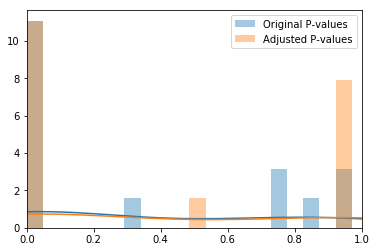

In [19]:
plt.xlim(0, 1)
sns.distplot(p_values, bins = 20, label = 'Original P-values')
sns.distplot(adjusted_p_values, bins = 20, label = 'Adjusted P-values')
plt.legend()

In [20]:
p_values

array([0.007, 0.005, 0.   , 0.   , 0.754, 0.   , 0.023, 0.924, 0.316,
       0.   , 0.849, 0.763, 0.971])

In [21]:
adjusted_p_values

array([0.01516667, 0.013     , 0.        , 0.        , 0.971     ,
       0.        , 0.04271429, 0.971     , 0.5135    , 0.        ,
       0.971     , 0.971     , 0.971     ])

In [22]:
df = pd.DataFrame({'p-values':p_values, 'adjusted-p-values':adjusted_p_values}, index = outcome_variables)

In [23]:
df['reject'] = np.where(df['p-values']<= df['adjusted-p-values'], 1, 0)

In [24]:
df

,p-values,adjusted-p-values,reject
Sent,0.007,0.015167,1
Act. Usrs,0.005,0.013000,1
Act.Usr (Order 2),0.000,0.000000,1
Num Conn.,0.000,0.000000,1
Sob. Ind,0.754,0.971000,1
Conn/user,0.000,0.000000,1
Prop. New.,0.023,0.042714,1
Density,0.924,0.971000,1
Avg. Clus.,0.316,0.513500,1
Num Conn (Order 2),0.000,0.000000,1


In [25]:
p_values = np.sort(p_values)
adjusted_p_values = np.sort(adjusted_p_values)

[-2.  0.  2.  4.  6.  8. 10. 12. 14.]


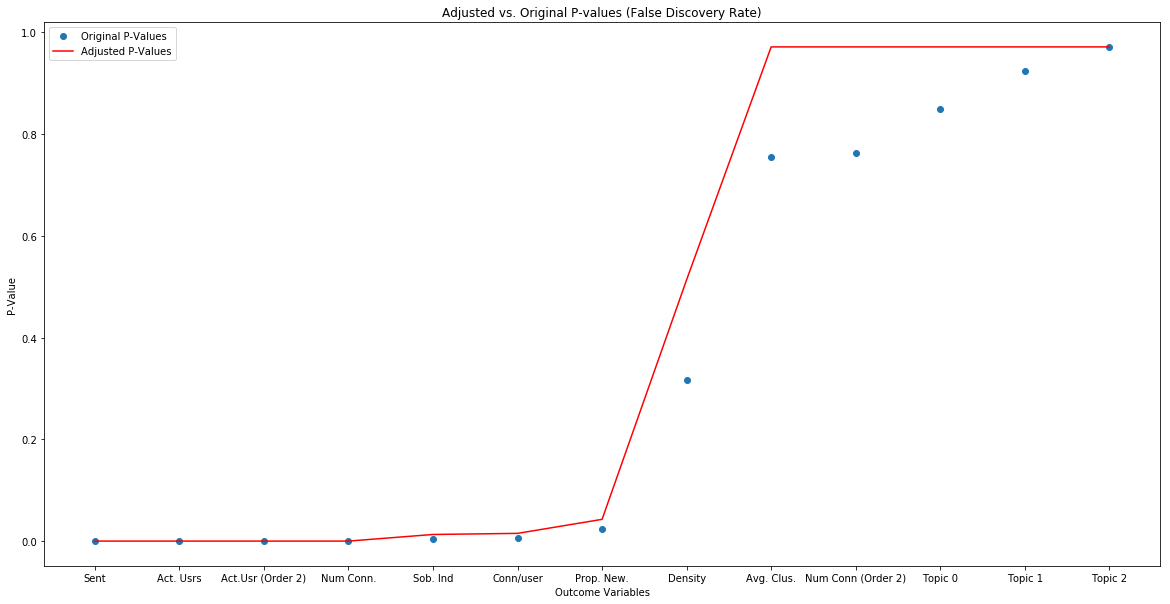

In [26]:
plt.figure(figsize = (20, 10))
plt.plot(p_values, label = 'Original P-Values', marker = 'o', linestyle = 'None')
plt.plot(adjusted_p_values, label= 'Adjusted P-Values', c= 'r')
plt.legend()
plt.title('Adjusted vs. Original P-values (False Discovery Rate)')
locs, labels = plt.xticks()
plt.xticks(range(len(outcome_variables)), outcome_variables)
plt.xlabel('Outcome Variables')
plt.ylabel('P-Value')
plt.savefig('Adjusted P-Values.png')
print(locs)